# Skenario Hierarchical Clustering (variasi teknik single, complete dan average link)

In [9]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# import the iris dataset with pandas
dataset = pd.read_csv('../dataset/Iris.csv')
print ("Shape of dataset: ", dataset.shape)

df = dataset.drop(['Species'], axis=1)
df.head()

Shape of dataset:  (150, 6)


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2

In [10]:
print ("Shape of dataset before cleaning: ", dataset.size)
dataset[[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]] = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(pd.to_numeric, errors='coerce')

dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", dataset.size)
dataset.head()

Shape of dataset before cleaning:  900
Shape of dataset after cleaning:  900


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [11]:
featureset = dataset[[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]

In [12]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [13]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [14]:
import pylab
import scipy.cluster.hierarchy
from scipy.cluster import hierarchy

# Z = hierarchy.linkage(D, 'complete')

For linkage method = single and n_cluster = 2 The average silhouette_score is : 0.6863930543445408
For linkage method = single and n_cluster = 3 The average silhouette_score is : 0.552329722756934
For linkage method = single and n_cluster = 4 The average silhouette_score is : 0.37859863990699344


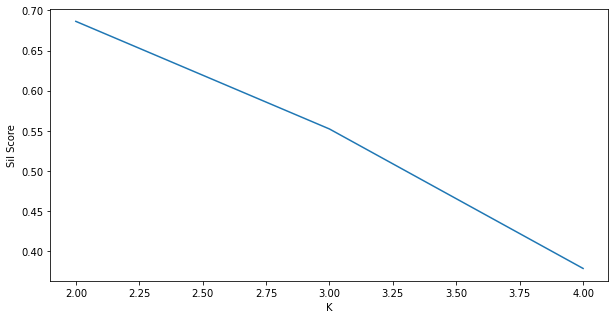

For linkage method = complete and n_cluster = 2 The average silhouette_score is : 0.3028964012569388
For linkage method = complete and n_cluster = 3 The average silhouette_score is : 0.5454506912996637
For linkage method = complete and n_cluster = 4 The average silhouette_score is : 0.3973512160928481


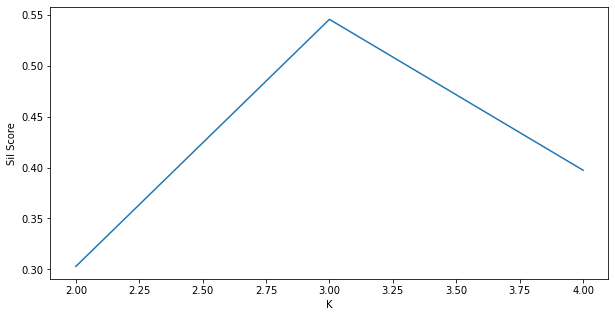

For linkage method = average and n_cluster = 2 The average silhouette_score is : 0.6863930543445408
For linkage method = average and n_cluster = 3 The average silhouette_score is : 0.5473331031975502
For linkage method = average and n_cluster = 4 The average silhouette_score is : 0.4225965495287503


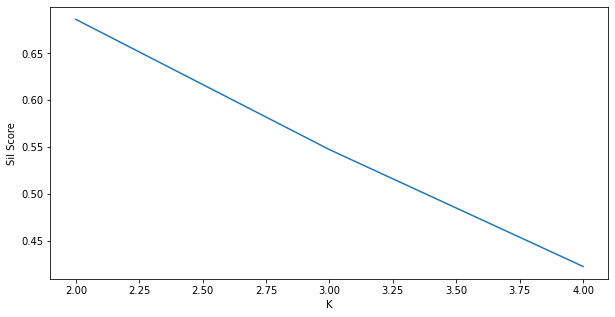

In [20]:
from scipy.cluster.hierarchy import fcluster
# max_d = 3
# clusters = fcluster(Z, max_d, criterion='distance')
# clusters

################################################################################
#    USING AGGLO CANT UNDERSTAND WHY USING NCLUSTER WHILE USING HIERARCHICAL   #
################################################################################
methods = ['single', 'complete', 'average']
n_cluster = [2,3,4]
sil_score = []
for linkage in methods:
    for K in n_cluster:
        agglom = AgglomerativeClustering(n_clusters = K, linkage = linkage)
        agglom.fit(feature_mtx)
        labels = agglom.labels_
        # print("===== [ ", linkage, " ] ======")
        # print(labels)
        sil_avg = silhouette_score(x, labels)
        print("For linkage method =", linkage,
              "and n_cluster =", K,
              "The average silhouette_score is :", sil_avg)
        sil_score.append(sil_avg)
    plt.figure(figsize=(10,5))
    plt.plot(n_cluster, sil_score)
    plt.xlabel('K')
    plt.ylabel('Sil Score')
    sil_score = []
    plt.show()

In [ ]:
from matplotlib import pyplot as plt 
fig = pylab.figure(figsize=(18,40))
# def llf(id):
#     return '[%s]' % (dataset['Species'])

dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0, leaf_font_size=12, orientation='right')

In [ ]:
import numpy as np

mapping_dict = { 
    1: 'Iris-setosa', 
    2: 'Iris-versicolor', 
    3: 'Iris-virginica'
}
dataset["Hierarchical_label"] = [mapping_dict[x] for x in clusters]
dataset['eq'] = np.where(dataset["Species"] == dataset["Hierarchical_label"], True, False)
dataset

In [ ]:
'akurasi : ' + str(round(dataset.loc[dataset['eq'] == True].count()[1] / dataset.shape[0] * 100, 3)) + ' %'